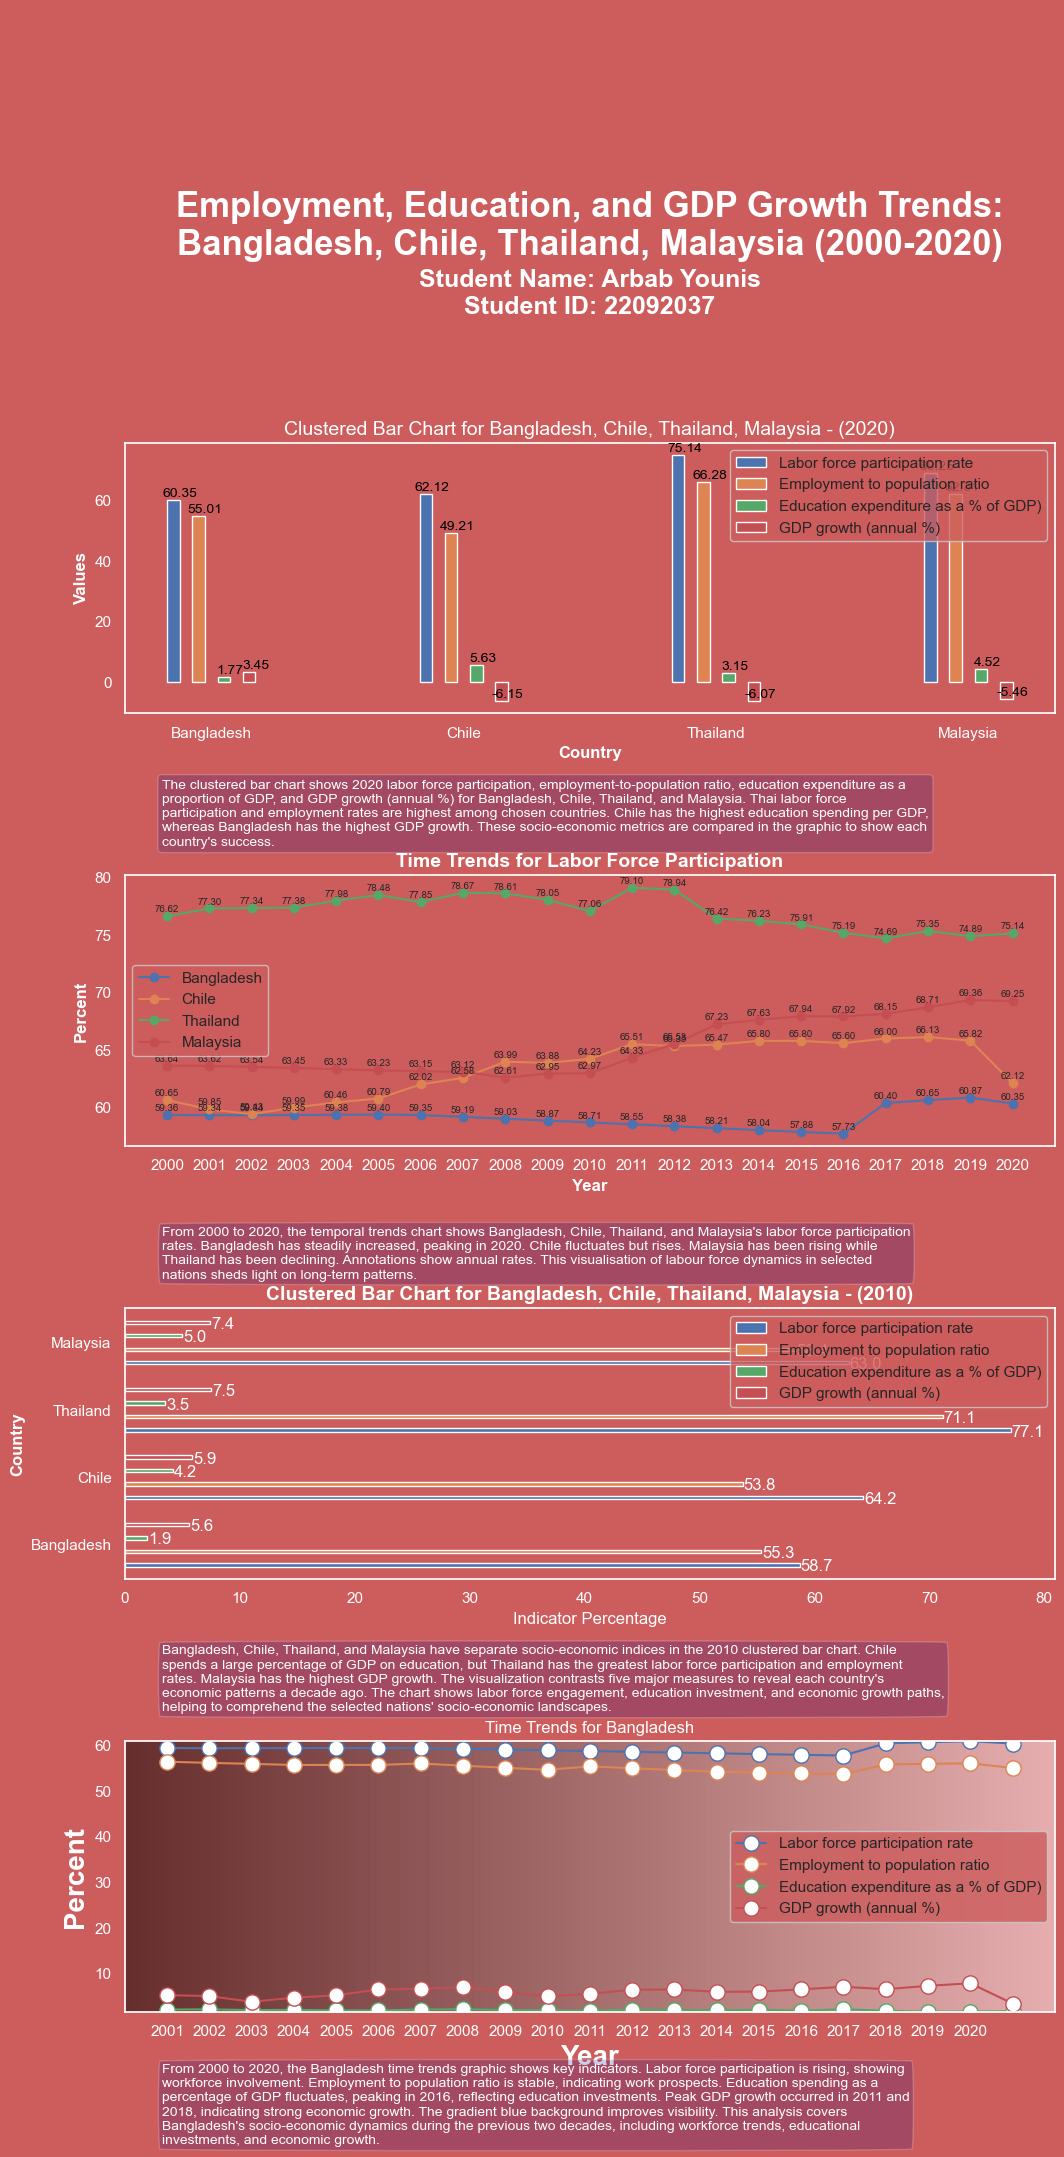

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the dataset
data = pd.read_csv('Master_Sheet.csv')

# Set the light background style
sns.set(rc={'axes.facecolor': 'indianred', 'figure.facecolor': 'indianred'})

# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(5, 1, figsize=(12, 26), gridspec_kw={'hspace': 0.6})  

indicators_to_analyze = ['Labor force participation rate',
                         'Employment to population ratio',
                         'Education expenditure as a % of GDP)',
                         'GDP growth (annual %)']

indicator_to_analyze_second_plot = 'Labor force participation rate'
selected_countries = ['Bangladesh', 'Chile', 'Thailand', 'Malaysia']
selected_country_fourth_plot = 'Bangladesh'
selected_year_first_plot = '2020'
selected_year_third_plot = '2010'
selected_data_1 = data[(data['Indicator Name'].isin(indicators_to_analyze)) & (data['Country Name'].isin(selected_countries))]
selected_data_2 = data[(data['Indicator Name'] == indicator_to_analyze_second_plot) & (data['Country Name'].isin(selected_countries))]
selected_data_4 = data[(data['Indicator Name'].isin(indicators_to_analyze)) & (data['Country Name'] == selected_country_fourth_plot)]

title_text = "Employment, Education, and GDP Growth Trends: Bangladesh, Chile, Thailand, Malaysia (2000-2020)"
student_name = 'Student Name: Arbab Younis'
student_id = 'Student ID: 22092037'

axs[0].wrapped_text = textwrap.fill(title_text, width=50)
axs[0].text(0.5, 0.2, axs[0].wrapped_text, ha='center', va='center', weight='bold', color='white', fontsize=25, transform=axs[0].transAxes)

axs[0].text(0.5, 0.0, student_name, ha='center', va='center', weight='bold', color='white', fontsize=18, transform=axs[0].transAxes)
axs[0].text(0.5, -0.1, student_id, ha='center', va='center', weight='bold', color='white', fontsize=18, transform=axs[0].transAxes)
axs[0].axis('off')  # Turn off axis for the first cell

# Plot 1: 

bar_positions = np.arange(len(selected_countries))
bar_width = 0.05
bar_gap = 0.05

for i, indicator in enumerate(indicators_to_analyze):
    values = selected_data_1[(selected_data_1['Indicator Name'] == indicator)][selected_year_first_plot].astype(float).values
    axs[1].bar(bar_positions + i * (bar_width + bar_gap), values, width=bar_width, label=indicator)

    for j, value in enumerate(values):
        axs[1].text(bar_positions[j] + i * (bar_width + bar_gap) + bar_width / 2, value + 0.05, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

axs[1].set_xlabel('Country', fontweight='bold', fontsize=12, color='white')
axs[1].set_ylabel('Values', fontweight='bold', fontsize=12, color='white')
axs[1].set_title(f'Clustered Bar Chart for {", ".join(selected_countries)} - ({selected_year_first_plot})', color='white', fontsize=14)
axs[1].set_xticks(bar_positions + (len(indicators_to_analyze) - 1) * (bar_width + bar_gap) / 2)
axs[1].set_xticklabels(selected_countries, color='white')
axs[1].tick_params(axis='y', colors='white')
axs[1].legend()
axs[1].grid(False)

# Explanation for the Clustered Bar Chart
long_text_0 = 'The clustered bar chart shows 2020 labor force participation, employment-to-population ratio, education expenditure as a proportion of GDP, and GDP growth (annual %) for Bangladesh, Chile, Thailand, and Malaysia. Thai labor force participation and employment rates are highest among chosen countries. Chile has the highest education spending per GDP, whereas Bangladesh has the highest GDP growth. These socio-economic metrics are compared in the graphic to show each country\'s success.'

# Wrap the text 
axs[1].wrapped_text = textwrap.fill(long_text_0, width=120, expand_tabs=False, replace_whitespace=False)

axs[1].text(0.04, -0.5, axs[1].wrapped_text, ha='left', va='bottom', color='white', fontsize=10, transform=axs[1].transAxes, bbox=dict(
        boxstyle='round',  
        facecolor='navy',   
        alpha=0.2,           
     ))

# Plot 2: Time Trends

#axs[1].set_facecolor('black')  # Set dark background

for country in selected_countries:
    country_data = selected_data_2[selected_data_2['Country Name'] == country]
    axs[2].plot(country_data.columns[2:], country_data.iloc[0, 2:], marker='o', label=country)

    for i, value in enumerate(country_data.iloc[0, 2:]):
        axs[2].annotate(f'{value:.2f}', (country_data.columns[2:][i], value), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=7)

# Set x-axis ticks and labels
axs[2].set_xticks(np.arange(len(selected_data_2.columns[2:])))
axs[2].set_xticklabels(selected_data_2.columns[2:], color='white')

# Set other properties for the subplot
axs[2].set_xlabel('Year', fontweight='bold', fontsize=12, color='white')
axs[2].set_ylabel('Percent', fontweight='bold', fontsize=12, color='white')
axs[2].set_title(f'Time Trends for Labor Force Participation', fontweight='bold', fontsize=14, color='white')
axs[2].tick_params(axis='y', colors='white')
axs[2].legend()
axs[2].grid(False)

# Explanation 
long_text_1 = 'From 2000 to 2020, the temporal trends chart shows Bangladesh, Chile, Thailand, and Malaysia\'s labor force participation rates. Bangladesh has steadily increased, peaking in 2020. Chile fluctuates but rises. Malaysia has been rising while Thailand has been declining. Annotations show annual rates. This visualisation of labour force dynamics in selected nations sheds light on long-term patterns.'

# Wrap the text 
axs[2].wrapped_text = textwrap.fill(long_text_1, width=120, expand_tabs=False, replace_whitespace=False)

axs[2].text(0.04, -0.5, axs[2].wrapped_text, ha='left', va='bottom', color='white', fontsize=10, transform=axs[2].transAxes, bbox=dict(
        boxstyle='round4',  
        facecolor='navy',   
        alpha=0.2,           
     ))

# Plot 3: Clustered Bar Chart for 2010

# Loop through each indicator and plot a clustered bar chart
for i, indicator in enumerate(indicators_to_analyze):
    values = selected_data_1[selected_data_1['Indicator Name'] == indicator][selected_year_third_plot].astype(float)

    bar_positions = np.arange(len(selected_countries))
    bar_width = 0.05

    axs[3].barh(bar_positions + i * len(selected_countries) * bar_width, values, height=bar_width, label=indicator)

    # Add labels to each bar outside the bars
    for j, value in enumerate(values):
        axs[3].text(value + 0.1, bar_positions[j] + i * len(selected_countries) * bar_width - bar_width / 2, f'{value:.1f}', ha='left', va='center', color='white')

# Set y-axis ticks and labels
axs[3].set_yticks(bar_positions + (len(indicators_to_analyze) - 1) * len(selected_countries) * bar_width / 2)
axs[3].set_yticklabels(selected_countries, color='white')

# Set other properties for the subplot
axs[3].set_xlabel('Indicator Percentage', color='white')
axs[3].set_ylabel('Country', fontweight='bold', fontsize=12, color='white')
axs[3].tick_params(axis='x', colors='white')
axs[3].set_title(f'Clustered Bar Chart for {", ".join(selected_countries)} - ({selected_year_third_plot})', fontweight='bold', fontsize=14, color='white')
axs[3].tick_params(axis='y', colors='white')
axs[3].legend()
axs[3].grid(False)

# Explanation for the Clustered Bar Chart
long_text_2 = 'Bangladesh, Chile, Thailand, and Malaysia have separate socio-economic indices in the 2010 clustered bar chart. Chile spends a large percentage of GDP on education, but Thailand has the greatest labor force participation and employment rates. Malaysia has the highest GDP growth. The visualization contrasts five major measures to reveal each country\'s economic patterns a decade ago. The chart shows labor force engagement, education investment, and economic growth paths, helping to comprehend the selected nations\' socio-economic landscapes.'

# Wrap the text 
axs[3].wrapped_text = textwrap.fill(long_text_2, width=120, expand_tabs=False, replace_whitespace=False)

axs[3].text(0.04, -0.5, axs[3].wrapped_text, ha='left', va='bottom', color='white', fontsize=10, transform=axs[3].transAxes, bbox=dict(
        boxstyle='round4',  
        facecolor='navy',   
        alpha=0.2,           
     ))

# Plot 4:

# Create a gradient blue background
gradient = np.linspace(0, 1, 125).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Plot time trends for the selected indicators and country
for indicator in indicators_to_analyze:
    indicator_data = selected_data_4[selected_data_4['Indicator Name'] == indicator]
    axs[4].plot(indicator_data.columns[2:], indicator_data.iloc[0, 2:], marker='o', markerfacecolor='white', markersize=11, label=indicator)

# Manually set y-axis limits based on the minimum and maximum values in the selected data
axs[4].set_ylim(bottom=selected_data_4.iloc[:, 2:].min().min(), top=selected_data_4.iloc[:, 2:].max().max())

# Use imshow to set the gradient background
axs[4].imshow(gradient, aspect='auto', extent=axs[4].get_xlim() + axs[4].get_ylim(), origin='lower', cmap='gray', alpha=0.5)

# Set x-axis ticks and labels
axs[4].set_xticks(np.arange(len(selected_data_4.columns[3:])))
axs[4].set_xticklabels(selected_data_4.columns[3:], color='white')

# Set y-axis ticks and labels
axs[4].tick_params(axis='y', colors='white')

axs[4].set_xlabel('Year', fontweight='bold', fontsize=20, color='white')
axs[4].set_ylabel('Percent', fontweight='bold', fontsize=20, color='white' )
axs[4].set_title(f'Time Trends for {selected_country_fourth_plot}', color='white')
axs[4].legend()

# Remove gridlines
axs[4].grid(False)

# Explanation for the Clustered Bar Chart
long_text_3 = 'From 2000 to 2020, the Bangladesh time trends graphic shows key indicators. Labor force participation is rising, showing workforce involvement. Employment to population ratio is stable, indicating work prospects. Education spending as a percentage of GDP fluctuates, peaking in 2016, reflecting education investments. Peak GDP growth occurred in 2011 and 2018, indicating strong economic growth. The gradient blue background improves visibility. This analysis covers Bangladesh\'s socio-economic dynamics during the previous two decades, including workforce trends, educational investments, and economic growth.'

# Wrap the text 
axs[4].wrapped_text = textwrap.fill(long_text_3, width=120, expand_tabs=False, replace_whitespace=False)

axs[4].text(0.04, -0.5, axs[4].wrapped_text, ha='left', va='bottom', color='white', fontsize=10, transform=axs[4].transAxes, bbox=dict(
        boxstyle='round4',  
        facecolor='navy',   
        alpha=0.2,           
     ))

# Save the figure as a PNG file
# plt.savefig("22092037.png", dpi=300, bbox_inches='tight')
plt.show()


